In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties like correlation of the dataset.

In [2]:
# Code starts here

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train
mean=train['Landsize'].mean()
train['Landsize']=train['Landsize'].replace(to_replace=0,value=mean)
train






# Code ends here.

,Id,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,124,3,2,995000,1,135,6.3,3143,2,2,480.500105,100.0,1998,26,145.01600,5,4836
1,5905,2,0,1080000,1,155,2.0,3066,1,0,480.500105,94.0,1890,31,144.98863,2,4553
2,5963,3,0,725000,1,196,17.9,3082,2,2,602.000000,129.0,1980,29,145.06912,2,10529
3,3521,4,0,1330000,1,251,8.0,3016,3,2,217.000000,266.0,2003,10,144.87960,6,6380
4,3738,3,0,620000,1,221,12.4,3060,1,2,604.000000,190.0,1970,23,144.96860,2,5070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4776,335,3,0,2251000,1,135,9.2,3104,1,2,888.000000,137.0,1950,2,145.09490,5,7809
4777,4714,3,2,1275000,1,255,10.1,3163,2,2,750.000000,132.0,1984,8,145.04924,5,7822
4778,2004,5,0,1975000,1,111,5.6,3101,2,1,531.000000,1022.0,1890,2,145.04110,5,10331
4779,227,4,0,1800000,1,106,11.0,3147,2,4,749.000000,206.0,1950,2,145.07700,5,3052


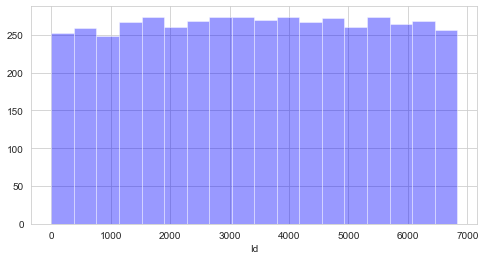

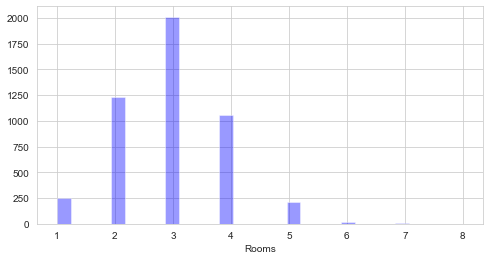

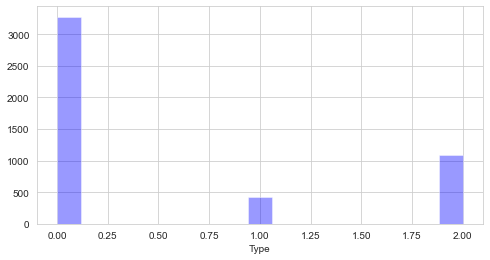

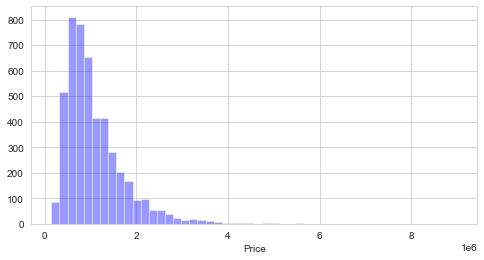

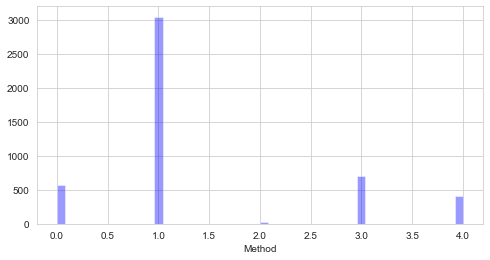

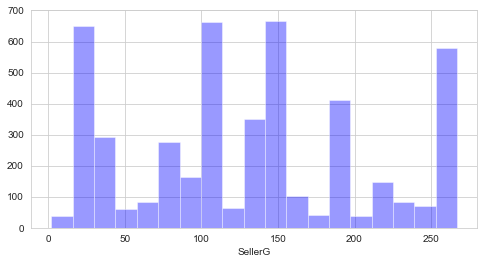

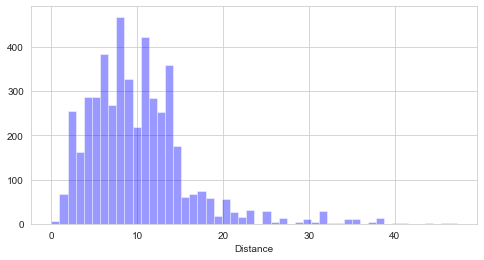

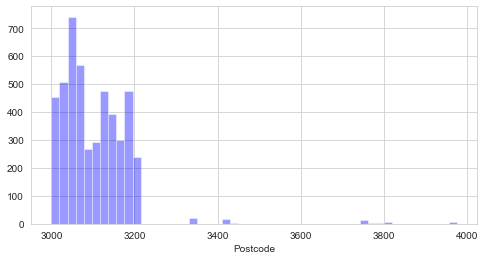

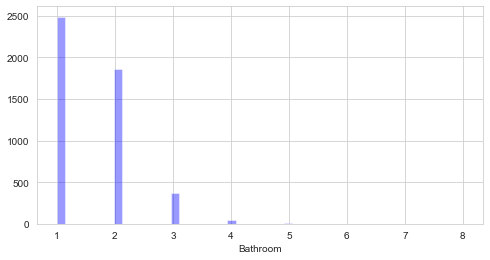

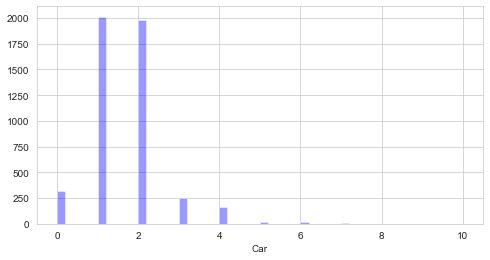

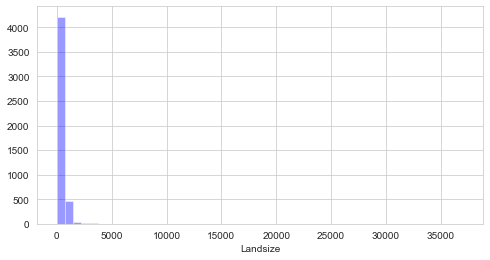

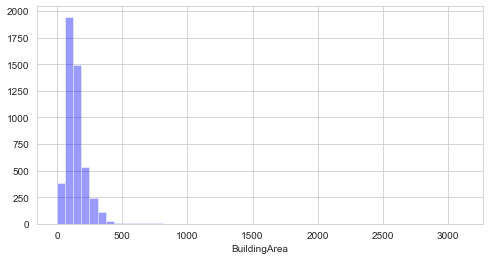

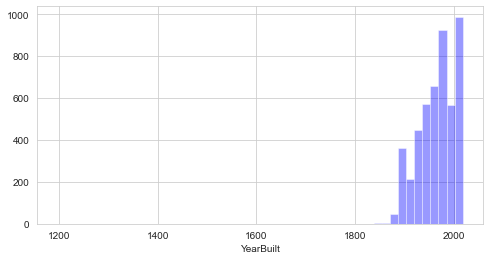

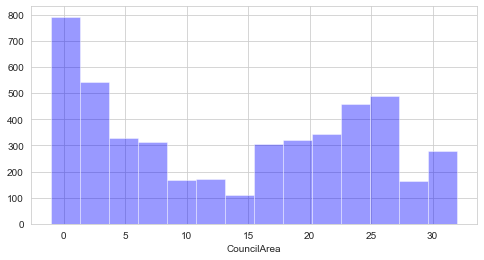

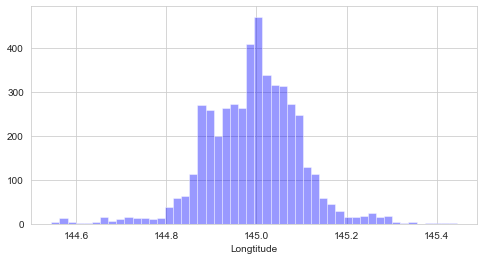

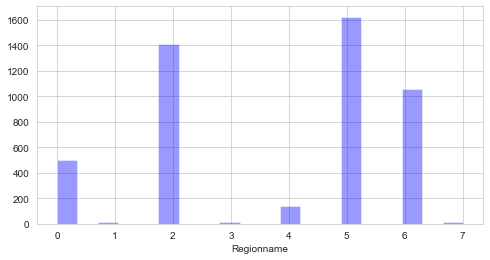

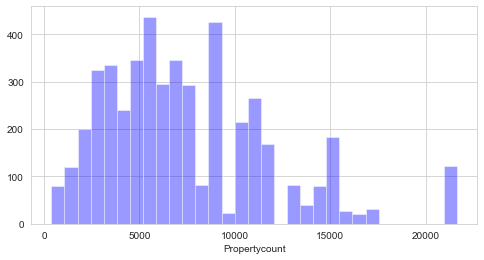

In [3]:
numcols= train.select_dtypes(include=['number']).columns.tolist()
for i in numcols:
    plt.figure(figsize=(8,4))
    sns.set_style('whitegrid')
    sns.distplot(train[i],kde=False,color='blue')
    plt.show()

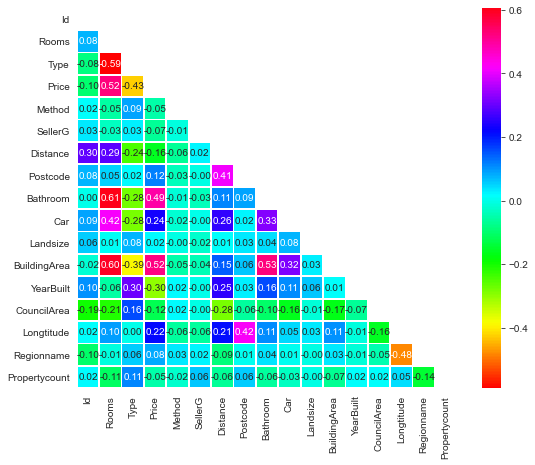

In [4]:
corr = train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr,mask=mask,square=True,annot=True,fmt='0.2f',linewidths=.8,cmap="hsv")

## Model building

- Separate the features and target and then split the train data into train and validation set.
- Apply different models of your choice and  then predict on the validation data and find the `accuracy_score` for this prediction.
- Try improving upon the `accuracy_score` using different regularization techniques.

In [5]:
X=train

In [6]:
# Code starts here


X1=X
Y=X1['Price']
X1=X1.drop('Price',axis=1)
X1=X1.drop(['Id'],axis=1)



X_train,X_test,y_train,y_test=train_test_split(X1,Y,train_size=0.8,random_state=2)


poly = PolynomialFeatures(2)
X_train_2=poly.fit_transform(X_train)
X_test_2 = poly.fit_transform(X_test)

model=LinearRegression(normalize=False)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

r2=r2_score(y_test,y_pred)
print(r2)

model1=Lasso()
model1.fit(X_train_2,y_train)
y_pred1=model1.predict(X_test_2)

r21=r2_score(y_test,y_pred1)
print(r21)




# Code ends here.

0.6627506994385585
0.7686772424694488


In [7]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

# regularization parameters for grid search
ridge_lambdas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]
lasso_lambdas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]

# Code starts here

# instantiate lasso and ridge models
lasso_model = Lasso()
ridge_model = Ridge()

# grid search on lasso and ridge
ridge_grid = GridSearchCV(estimator = ridge_model, param_grid = dict(alpha = ridge_lambdas))
ridge_grid.fit(X_train_2,y_train)

lasso_grid = GridSearchCV(estimator = lasso_model, param_grid = dict(alpha = lasso_lambdas))
lasso_grid.fit(X_train_2,y_train)

# make predictions 
lasso_pred = lasso_grid.predict(X_test_2)
ridge_pred = ridge_grid.predict(X_test_2)

# print out which is better
r22=r2_score(y_test,lasso_pred)
print(r22)
r22=r2_score(y_test,ridge_pred)
print(r22)

0.7686772424694488
0.7567943293847378


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()



X_train,X_test,y_train,y_test=train_test_split(X1,Y,train_size=0.8,random_state=2)

model=LinearRegression(normalize=False)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

rfe=RFE(model,n_features_to_select=8)
rfe=rfe.fit(X_train,y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

y_p=rfe.predict(X_test)
r2=r2_score(y_test,y_p)
print(r2)



0.5764188359461665


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [10]:
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores

array([0.65375092, 0.66144494, 0.57328423, 0.58234615, 0.48787376])

In [12]:
from sklearn.model_selection import KFold

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores   

array([0.62156633, 0.50357323, 0.65056343, 0.56450737, 0.62304878])

In [15]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 15))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    3.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14]}],
             return_train_score=True, scoring='r2', verbose=1)

In [16]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.055939,0.013751,0.011047,0.006284,1,{'n_features_to_select': 1},0.036452,0.060063,0.051875,0.050388,...,0.045718,0.010995,14,0.049911,0.044136,0.046620,0.047025,0.051197,0.047778,0.002506
1,0.047429,0.001108,0.001601,0.003203,2,{'n_features_to_select': 2},0.270879,0.166689,0.265669,0.313454,...,0.266248,0.053843,13,0.271316,0.296353,0.272820,0.261435,0.256444,0.271674,0.013764
2,0.052230,0.011202,0.004977,0.004077,3,{'n_features_to_select': 3},0.340171,0.283110,0.363523,0.412299,...,0.356472,0.043661,12,0.365985,0.380091,0.361134,0.349759,0.352967,0.361987,0.010727
3,0.050180,0.008979,0.005745,0.003142,4,{'n_features_to_select': 4},0.349052,0.310199,0.383015,0.428383,...,0.373470,0.040609,11,0.384704,0.394614,0.377497,0.366979,0.371135,0.378986,0.009849
4,0.047591,0.003860,0.006400,0.003200,5,{'n_features_to_select': 5},0.394831,0.355937,0.420929,0.458655,...,0.412398,0.034869,10,0.421470,0.431332,0.415909,0.407118,0.410579,0.417282,0.008545
5,0.041871,0.005876,0.006325,0.005866,6,{'n_features_to_select': 6},0.535400,0.476326,0.579252,0.576860,...,0.545461,0.037960,9,0.552749,0.567765,0.542656,0.543791,0.545669,0.550526,0.009306
6,0.040298,0.007411,0.006250,0.007655,7,{'n_features_to_select': 7},0.540497,0.474454,0.579268,0.578813,...,0.546766,0.038855,7,0.553569,0.570280,0.544808,0.545472,0.547540,0.552334,0.009490
7,0.040914,0.006270,0.006403,0.003201,8,{'n_features_to_select': 8},0.541021,0.472991,0.579169,0.579292,...,0.546715,0.039469,8,0.553645,0.570760,0.545038,0.545539,0.547657,0.552528,0.009616
8,0.032614,0.003875,0.012577,0.003735,9,{'n_features_to_select': 9},0.565724,0.476361,0.603231,0.599388,...,0.565056,0.046356,5,0.571146,0.593107,0.562339,0.563928,0.566153,0.571335,0.011284
9,0.032126,0.009451,0.006402,0.005941,10,{'n_features_to_select': 10},0.566847,0.475349,0.603522,0.550116,...,0.555883,0.043990,6,0.572449,0.594918,0.563857,0.597153,0.566758,0.579027,0.014178


In [23]:
n_features_optimal = 1

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.6627506994385585


In [ ]:
id_ = test['Id']
test=test.drop(['Id'],axis=1)


In [ ]:
# Code starts here

test_poly = poly.transform(test)
y_pred_test = model1.predict(test_poly)
print(y_pred_test)








# Code ends here.

In [ ]:
sample_submission = pd.DataFrame({'Id':id_,'Price':y_pred_test})

In [ ]:
sample_submission.to_csv('melbourne4.csv',index=False)